In [69]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

In [18]:
# read in the dataset
df = pd.read_excel("data/GDSC2.xlsx")

df.head

<bound method NDFrame.head of        DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
0        GDSC2             343       15946310     683667         PFSK-1   
1        GDSC2             343       15946548     684052           A673   
2        GDSC2             343       15946830     684057            ES5   
3        GDSC2             343       15947087     684059            ES7   
4        GDSC2             343       15947369     684062          EW-11   
...        ...             ...            ...        ...            ...   
242031   GDSC2             343       16188242    1659928        SNU-175   
242032   GDSC2             343       16188695    1660034        SNU-407   
242033   GDSC2             343       16188953    1660035         SNU-61   
242034   GDSC2             343       16189493    1674021         SNU-C5   
242035   GDSC2             343       16189775    1789883           DiFi   

       SANGER_MODEL_ID     TCGA_DESC  DRUG_ID          DRUG_NAME  \
0

In [19]:
df = df.drop(
    columns=[
        "DATASET",
        "NLME_RESULT_ID",
        "NLME_CURVE_ID",
        "SANGER_MODEL_ID",
        "COMPANY_ID",
        "WEBRELEASE",
        "DRUG_ID",
    ]
)

In [20]:
df.columns

Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_NAME',
       'PUTATIVE_TARGET', 'PATHWAY_NAME', 'MIN_CONC', 'MAX_CONC', 'LN_IC50',
       'AUC', 'RMSE', 'Z_SCORE'],
      dtype='object')

In [24]:
df.describe()

,COSMIC_ID,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
count,2.420360e+05,242036.000000,242036.000000,242036.000000,242036.000000,242036.000000,2.420360e+05
mean,9.921059e+05,0.023143,23.462279,2.817079,0.882592,0.082779,7.312962e-10
std,2.209819e+05,0.158738,158.622810,2.762229,0.146998,0.042695,9.993925e-01
min,6.836670e+05,0.000010,0.010000,-8.747724,0.006282,0.003274,-8.254501e+00
25%,9.068050e+05,0.003002,3.000000,1.508018,0.849449,0.051107,-6.568485e-01
50%,9.097200e+05,0.010005,10.000000,3.236731,0.944196,0.076083,1.058000e-02
75%,1.240144e+06,0.010005,10.000000,4.700110,0.974934,0.106105,6.560362e-01
max,1.789883e+06,2.001054,2000.000000,13.820189,0.998904,0.299984,7.978776e+00


In [37]:
df["TCGA_DESC"].unique()

array(['MB', 'UNCLASSIFIED', 'SKCM', 'BLCA', 'CESC', 'GBM', 'LUAD',
       'LUSC', 'SCLC', 'MESO', 'NB', 'MM', 'PAAD', 'ESCA', 'BRCA', 'HNSC',
       'KIRC', 'LAML', 'OV', 'PRAD', 'COREAD', 'LCML', 'ALL', 'LGG', nan,
       'THCA', 'STAD', 'DLBC', 'UCEC', 'LIHC', 'CLL', 'ACC', 'OTHER'],
      dtype=object)

In [25]:
print(df.isnull().sum())

COSMIC_ID              0
CELL_LINE_NAME         0
TCGA_DESC           1067
DRUG_NAME              0
PUTATIVE_TARGET    27155
PATHWAY_NAME           0
MIN_CONC               0
MAX_CONC               0
LN_IC50                0
AUC                    0
RMSE                   0
Z_SCORE                0
dtype: int64


In [26]:
continuous_ftrs = ["MIN_CONC", "MAX_CONC", "LN_IC50", "AUC", "RMSE", "Z_SCORE"]
categorical_ftrs = [
    "COSMIC_ID",
    "CELL_LINE_NAME",
    "TCGA_DESC",
    "DRUG_NAME",
    "PUTATIVE_TARGET",
    "PATHWAY_NAME",
]

In [29]:
scaler = StandardScaler()
sk_results = scaler.fit_transform(df[continuous_ftrs])
sk_scaled = pd.DataFrame(sk_results, columns=continuous_ftrs, index=df.index)
print("sk_scaled")
print(sk_scaled.head)
print(sk_scaled.shape)

sk_scaled
<bound method NDFrame.head of          MIN_CONC   MAX_CONC   LN_IC50       AUC      RMSE   Z_SCORE
0       -0.145163  -0.147282 -1.549826  0.324003  0.146922  0.433387
1       -0.145163  -0.147282 -2.782734 -1.820581  0.669213 -1.421967
2       -0.145163  -0.147282 -2.236483 -0.622594  1.407106 -0.599935
3       -0.145163  -0.147282 -2.846265 -1.972352  1.235749 -1.517572
4       -0.145163  -0.147282 -2.374562 -1.010524  1.060551 -0.807724
...           ...        ...       ...       ...       ...       ...
242031  12.460237  12.460640  2.646420  0.640511 -0.193964  0.156968
242032  12.460237  12.460640  2.085022  0.209430 -0.584576 -1.627951
242033  12.460237  12.460640  2.788535  0.628640 -0.578275  0.608813
242034  12.460237  12.460640  2.851869  0.594408  0.427075  0.810178
242035  12.460237  12.460640  2.613020  0.574129  0.147039  0.050777

[242036 rows x 6 columns]>
(242036, 6)


In [70]:
scaler = OrdinalEncoder()
sk_results = scaler.fit_transform(df[categorical_ftrs])
print("sk_results")
print(sk_results)
print(sk_results.shape)

sk_results
[[  0. 736.  18.  73. 165.   7.]
 [  1.  27.  31.  73. 165.   7.]
 [  2. 199.  31.  73. 165.   7.]
 ...
 [965. 849.   6. 172. 112.  14.]
 [967. 853.   6. 172. 112.  14.]
 [968. 177.   6. 172. 112.  14.]]
(242036, 6)


In [62]:
df["LN_IC50"].mean()

np.float64(2.8170790635979768)

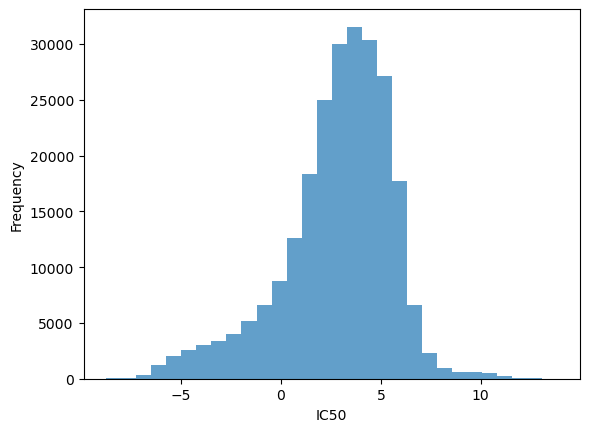

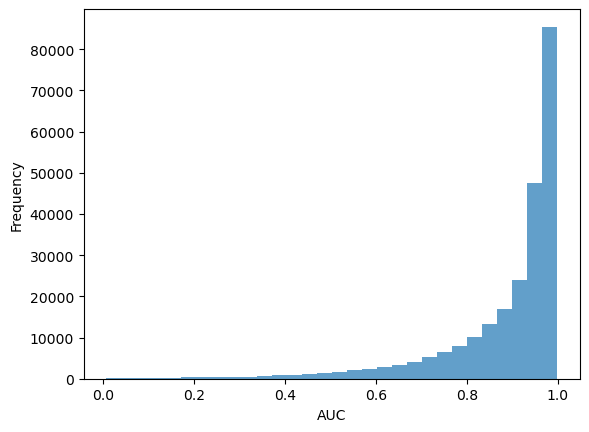

In [53]:
df["LN_IC50"].plot(kind="hist", bins=30, alpha=0.7)
plt.xlabel("IC50")
plt.ylabel("Frequency")
plt.show()

df["AUC"].plot(kind="hist", bins=30, alpha=0.7)
plt.xlabel("AUC")
plt.ylabel("Frequency")
plt.show()

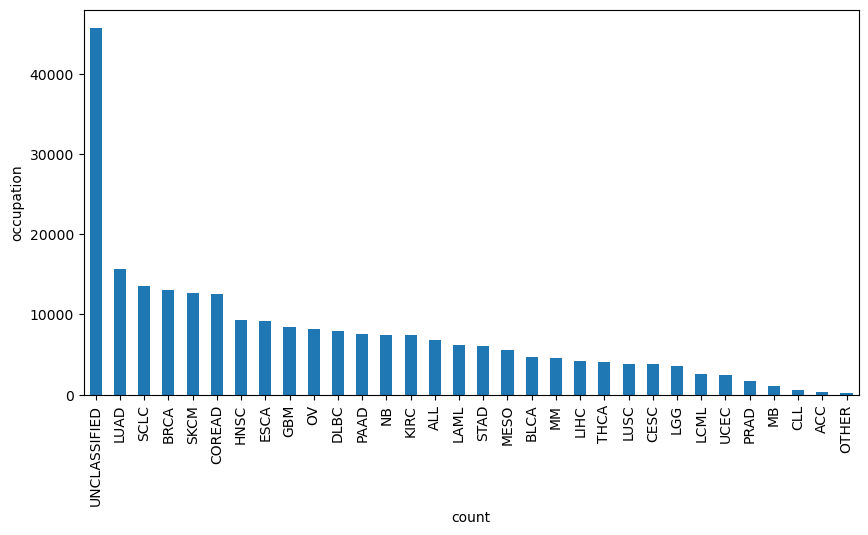

In [55]:
plt.figure(figsize=(10, 5))
df["TCGA_DESC"].value_counts().plot.bar()
plt.xlabel("count")
plt.ylabel("occupation")
plt.show()

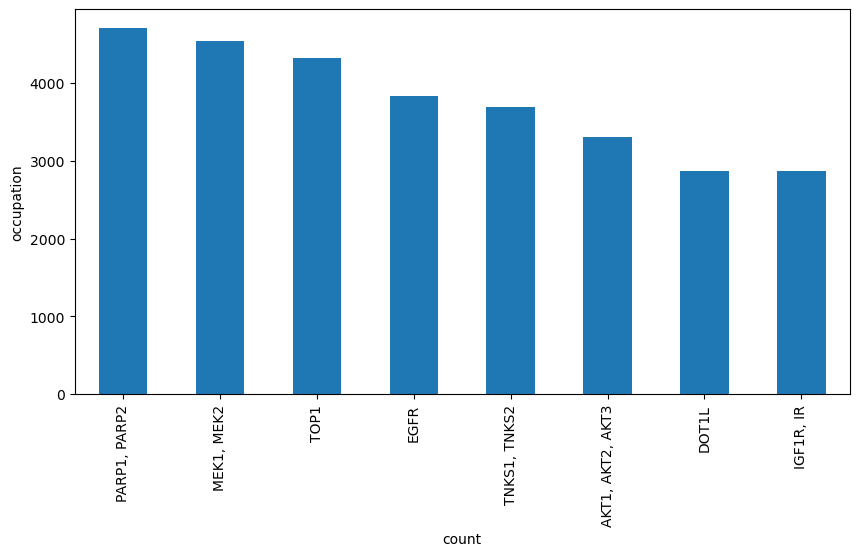

In [61]:
plt.figure(figsize=(10, 5))
df["PUTATIVE_TARGET"].value_counts().nlargest(8).plot.bar()
plt.xlabel("count")
plt.ylabel("occupation")
plt.show()

In [ ]:
y = df["LN_IC50"]
X = df.loc[:, df.columns != "IC50"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print("training set:", X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

training set: (169425, 12) (169425,)
(72611, 12) (72611,)
